In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
new_df = pd.read_excel('Lab 3 Data Capture (2).xlsx')
new_df.rename(columns={'Voltage (mV)': 'Voltage (V)'}, inplace=True)
new_df

,Mass,Voltage (V)
0,0.0,-0.020
1,28.8,0.065
2,57.2,0.115
3,98.5,0.220


### Best fit calibration curve

**Caption**: This graph shows that as Mass increases, Voltage increases too. I increased the mass by adding 3 washers between *28.8 - 41.4 grams*, and measured the individual Voltages after 2-3 seconds. The washers were added to the Strain Gauge at the top of my breadboard. 

Equation of the line of best fit: y =  
0.002379 x - 0.01473


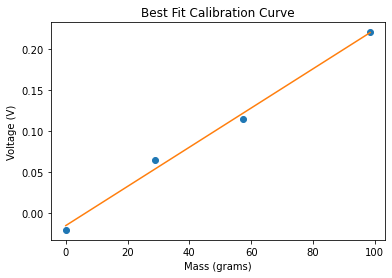

In [3]:
import numpy as np
coeffs = np.polyfit(new_df['Mass'], new_df['Voltage (V)'], 1)
line = np.poly1d(coeffs)
plt.xlabel('Mass (grams)')
plt.ylabel('Voltage (V)')
plt.title('Best Fit Calibration Curve')
plt.plot(new_df['Mass'], new_df['Voltage (V)'], 'o', new_df['Mass'], line(new_df['Mass']), '-')
print("Equation of the line of best fit: y = {}".format(line))

### Computation of error (formula and explanation)

To compute my percentage error, I substituted 41.7 (the mass I measured) into my linear regression equation to see what the output would be, helping me plot this theoretical point and see where it is on the line. In addition, it gives me an x-measured value to plug into the absolute value equation given in the lab (x-measured - x-known/x-known). My final percentage error is 16% (rounded) and within the 20% acceptable range.  

In [11]:
error_value = 0.002379 * 41.7 - 0.01473
error_value

0.0844743

In [14]:
# x_measured - x_known/x_known

x_measured = 0.0844743
x_known = 0.1

percentage_error = np.abs((x_measured - x_known)/x_known)
percentage_error

0.15525700000000003

### Computation of % error (not graded)

In [4]:
def scale_error(dataframe, processed = []):
    measured_mass = 41.7
    #measured_voltage = 0.1
    if not dataframe:
        return []
    else:
        result = []
        for temp in dataframe:
            if temp not in processed:
                result.append(abs(measured_mass - temp) / temp * 100)
                processed.append(temp)
            return result + scale_error(dataframe[1:], processed)

scale_error([28.8, 57.2, 98.5])

[44.79166666666667, 27.0979020979021, 57.66497461928933]

In [7]:
output = pd.DataFrame({
    '% Error Output' : [44.79166666666667, 27.0979020979021, 57.66497461928933]
})
output

new_df = new_df.merge(output, left_index=True, right_index=True)
#new_df = new_df.drop(['% Error Output_x', '% Error Output_y'], axis=1)
new_df

,Mass,Voltage (V),% Error Output_x,% Error Output_y,% Error Output
0,0.0,-0.020,44.791667,44.791667,44.791667
1,28.8,0.065,27.097902,27.097902,27.097902
2,57.2,0.115,57.664975,57.664975,57.664975
